In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# データ作成

In [0]:
x = [1.0, 4.0]
y = [1.0, 8.0]

## データplot

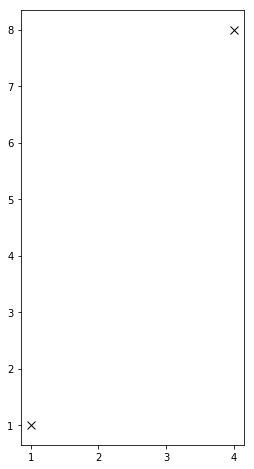

In [19]:
plt.figure(figsize=(np.max(x),np.max(y)))
plt.plot (x, y, 'kx', markersize=8)
plt.xticks(np.arange(np.min(x), np.max(x) + 1, 1))
plt.yticks(np.arange(np.min(y), np.max(y) + 1, 1))
plt.show()

# 線形回帰

## モデルの定義 (パラメータの定義)

In [0]:
#f = w1*x + w2
w1 = 0
w2 = 0

### パラメータ計算

ここでは，最小二乗法により算出する

*min sum{ (y - f)^2 }*

[解くとこうなる]

・w1 = cov[x, y]/var[x]  

・w2 = E[y] - ( cov(x, y)/var[x] ) * E[x]

(cov: 共分散，var: 分散, E: 平均)

cov[x, y] = E[xy] - E[x] * E[y]

var[x] = E[x^2] - E[x]^2


In [0]:
N = len(x)
sum_x = np.sum(??) #E[x] * N
sum_y = np.sum(??) #E[y] * N
sum_sq_x = np.sum(np.square(??)) # E[x^2] * N
sum_xy = np.sum(np.array(??) * np.array(??)) #E[xy] * N

In [0]:
w1 = (?? * ?? - ?? * ??) / (N * ?? - np.square(??))
w2 = (N * ?? - ?? * ??) / (N * ?? - np.square(??))

### 行列で計算する場合

In [0]:
A = [[N, sum_x], [sum_x, sum_sq_x]]
B = [sum_y, sum_xy]
W = inv(A).dot(B)

## 求めた式のplot

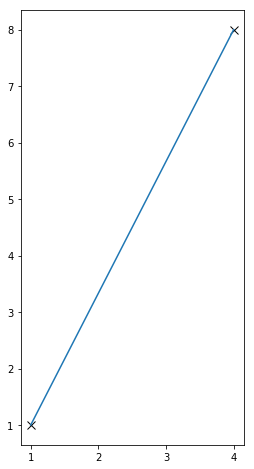

In [24]:
tt = np.linspace(np.min(x), np.max(x), 20)
f = W[??]*tt + W[??]

plt.figure(figsize=(np.max(x),np.max(y)))
plt.plot (x, y, 'kx', markersize=8)
plt.xticks(np.arange(np.min(x), np.max(x) + 1, 1))
plt.yticks(np.arange(np.min(y), np.max(y) + 1, 1))

#直線
plt.plot (tt, f)
plt.show()

In [0]:
#ここまで、単回帰

In [0]:
#おまけ

#サンプリングベース

In [0]:
import torch

##データ作成

In [0]:
x_data = torch.tensor( [x[0], x[1] ] )
y_data = torch.tensor( [y[0], y[1] ] )

##変数作成

In [0]:
a = torch.tensor([0.0], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

##最適化方法定義

In [0]:
optimizer = torch.optim.Adam( [a, b] )

学習されたaとb： tensor([0.0010], requires_grad=True) tensor([0.0010], requires_grad=True)


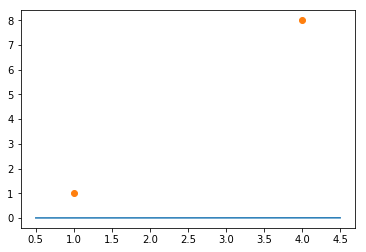

学習されたaとb： tensor([0.1356], requires_grad=True) tensor([0.1356], requires_grad=True)


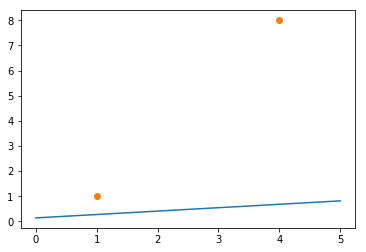

学習されたaとb： tensor([0.2942], requires_grad=True) tensor([0.2940], requires_grad=True)


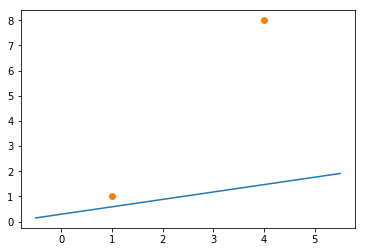

学習されたaとb： tensor([0.4555], requires_grad=True) tensor([0.4547], requires_grad=True)


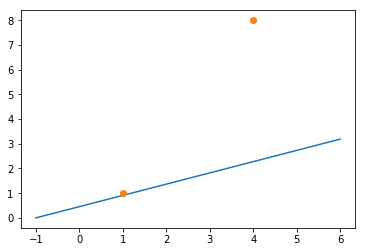

学習されたaとb： tensor([0.6167], requires_grad=True) tensor([0.6150], requires_grad=True)


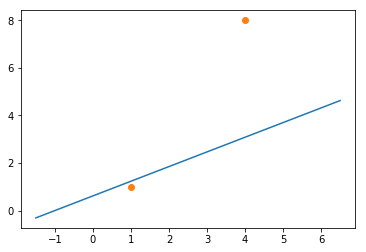

学習されたaとb： tensor([0.7768], requires_grad=True) tensor([0.7738], requires_grad=True)


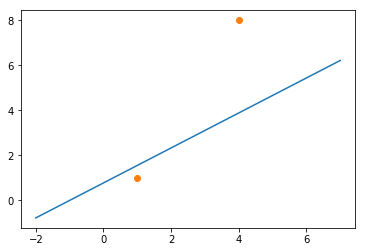

学習されたaとb： tensor([0.9355], requires_grad=True) tensor([0.9305], requires_grad=True)


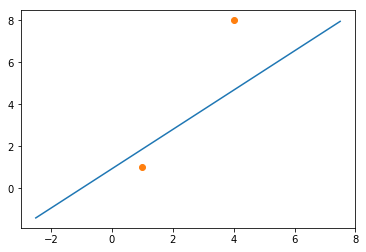

学習されたaとb： tensor([1.0923], requires_grad=True) tensor([1.0845], requires_grad=True)


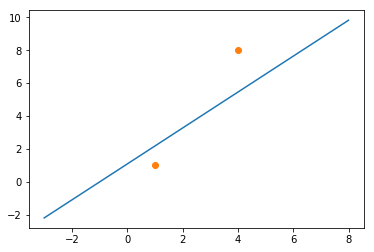

学習されたaとb： tensor([1.2466], requires_grad=True) tensor([1.2346], requires_grad=True)


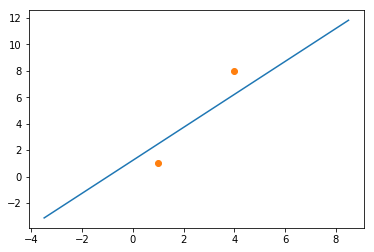

学習されたaとb： tensor([1.3974], requires_grad=True) tensor([1.3790], requires_grad=True)


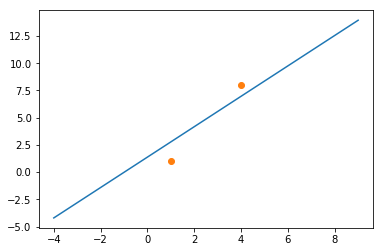

学習されたaとb： tensor([1.5421], requires_grad=True) tensor([1.5141], requires_grad=True)


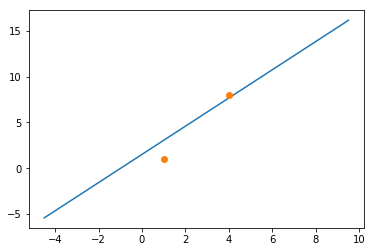

In [31]:
 for i in range(1001):
    # 関数に値を入れて出力を計算
    y = a * x_data + b
      
    # 関数の出力yとデータy_dataの誤差を計算
    loss = torch.sqrt(1/2*(y[0]-y_data[0])*(y[0]-y_data[0]) + (y[1]-y_data[1])*(y[1]-y_data[1]))

    # 誤差が小さくなるようにaとbの値を少し変える
    loss.backward()
    optimizer.step()
 
    if i%100==0:
      # xにx_minからx_maxを代入して，yの値を確認する
      x = torch.linspace(min(x) - 0.5, max(x) + 0.5,100)
      y = a * x + b

      print("学習されたaとb：", a, b)
      plt.clf()
      plt.plot( list(x), list(y),"-")
      plt.plot( list(x_data), list(y_data), "o")
      plt.show()

In [0]:
#Question
#y = a*x^3 + b*x^2 + c*x + d